In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

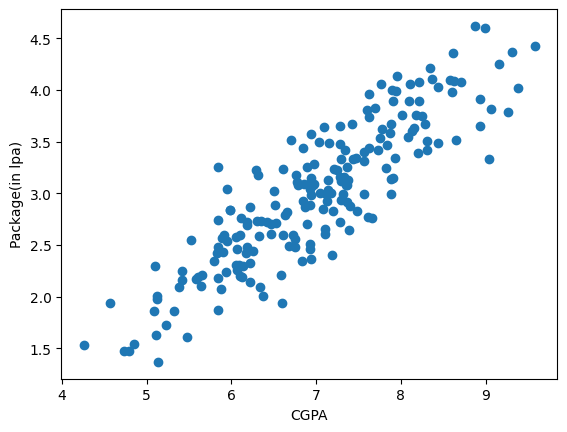

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [6]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [7]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [8]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr=LinearRegression()

In [12]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
x_test

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93
115,8.35
69,7.30
170,6.22
174,7.32
45,7.87


In [14]:
y_test

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
115    4.21
69     2.94
170    2.87
174    2.99
45     3.58
66     1.63
182    2.08
165    4.08
78     2.21
186    3.47
177    3.64
56     2.74
152    3.08
82     2.17
68     2.99
124    2.31
16     2.35
148    3.40
93     3.08
65     3.81
60     2.19
84     1.53
67     2.89
125    3.16
132    2.48
9      3.51
18     2.98
55     3.39
75     3.28
150    2.73
104    3.74
135    2.60
137    3.13
164    3.82
76     3.15
Name: package, dtype: float64

In [15]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

C:\Users\harry\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.78031348])

Text(0, 0.5, 'Package(in lpa)')

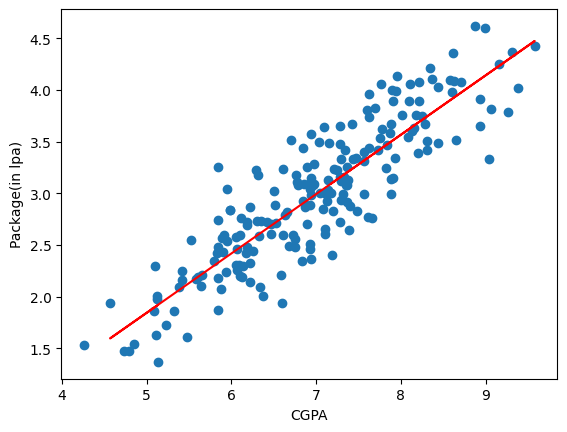

In [16]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [17]:
m=lr.coef_

In [18]:
b=lr.intercept_

In [19]:
# y=mx+b
m*6.63+b

array([2.78031348])

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [24]:
y_pred=lr.predict(x_test)

In [23]:
y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [25]:
print("MEA",mean_absolute_error(y_test,y_pred))

MEA 0.23150985393278373


In [26]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.08417638361329656


In [27]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.2901316659954521


In [29]:
print('MSE',r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)

MSE 0.7730984312051673


In [30]:
# Adjusted R2 score
x_test.shape

(40, 1)

In [31]:
1-(((1-r2)*(40-1))/(40-1-1))

0.7671273372895138

In [32]:
new_df1=df.copy()
new_df1['random_feature']=np.random.random(200)
new_df1=new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.737346,3.26
1,5.12,0.310532,1.98
2,7.82,0.949148,3.25
3,7.42,0.962365,3.67
4,6.94,0.536441,3.57


Text(0, 0.5, 'package(in lpa)')

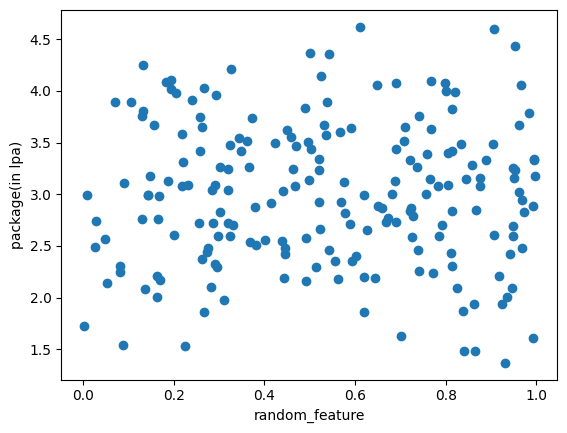

In [33]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('package(in lpa)')

In [34]:
x=new_df1.iloc[:,0:2]
y=new_df1.iloc[:,-1]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [36]:
lr=LinearRegression()

In [37]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred=lr.predict(x_test)

In [39]:
print('R2-score',r2_score(y_test,y_pred))
r2=r2_score(y_test,y_pred)


R2-score 0.7784623083747148


In [40]:
1-(((1-r2)*(40-1))/(40-1-1))

0.7726323691214178